# Using the random module

Make sure to import everything we need for this notebook first.

In [2]:
import matplotlib.pyplot as plt
import random
import string

## .. but first, let's create our own random function

Python's standard `random` module generates pseudo-random numbers, which means that values only look like truly random values and that they are generated through some deterministic function. There are many different implementations of a pseudo-random generator (one being the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) which the `random` module uses under the hood), but in fact we can create our own pseudo-random number generator with our own implementation of "randomness".

In [3]:
class PseudoRandom():
    def __init__(self, seed=1):
        self.seed = seed
        
    def random(self):
        self.seed = (self.seed * 7) % 13
        return self.seed

In [4]:
random_numbers = PseudoRandom(123)

[random_numbers.random() for _ in range(10)]

[3, 8, 4, 2, 1, 7, 10, 5, 9, 11]

Our PseudoRandom class takes in an initial value called a **seed**. Each time the `random()` function is called, the current value of the seed is multiplied by 7 then divided by 13 -- this is our function for "randomness". The remainder becomes the new value of the seed until the `random()` function is called again. This makes the function _deterministic_ - if two people initiated the class with the same seed value and called the `random()` function, then they would get the same numbers on each same instance they call `random()`.

The above example gives us a basic understanding of how Python's `random` module works. The module has a bunch of pseudo-random number generator functions that we can use for what ever purpose.  In the next sections, I will refer to pseudo-random numbers as just *random* numbers for brevity.

## Functions in the `random` module

The random() function accepts a seed from which to generate random numbers. If no seed is provided, it uses some source of randomness from your OS (you can read more about pseudo-random generators [here](https://www.random.org/randomness/)) and returns a float from the __standard uniform distribution__ (numbers from 0 to 1).

In [5]:
# Unseeded random numbers
print(random.random())
print(random.random())
print(random.random())

0.6489066202916949
0.31088700567600724
0.7954640522784109


In [294]:
# Seeded random numbers
random.seed(1234)
print(random.random())
print(random.random())
print(random.random(), end='\n\n')

random.seed(1234)
print(random.random())
print(random.random())
print(random.random())

0.9664535356921388
0.4407325991753527
0.007491470058587191

0.9664535356921388
0.4407325991753527
0.007491470058587191


### Random numbers from a uniform distribution

Numbers in a uniform distribution means that each number has the same probability of being picked as all other numbers. Using the `random()` function picks a number between 0 and 1 by default.

To generate a __random float__ within a custom range of (min, max) values from a uniform distribution, we use the `uniform()` function. This accepts two parameters: the minimum value, and the maximum value. The following will generate a number between 1 and 2 (the discrete number 2 is excluded from the range).

In [60]:
# random float
random.uniform(1, 2)

1.9701314376170462

To generate a __random integer__ within a range of (min, max) values from a uniform distribution, we can specify a custom range to the `randrange()` function. This will generate a number between the minimum value (inclusive) and the maximum value (exclusive).

In [61]:
random.randrange(1, 100)

41

Now that we know some functions to generate random integers or floats, we can use list comprehension to generate several random values that can serve as our dataset.

For example, we can generate 1000 random integers between 0 and 100 in a uniform distribution.

In [62]:
data = [random.randrange(0, 100) for _ in range(1000)]

We can plot our dataset with matplotlib to visually check the distribution of our random numbers.

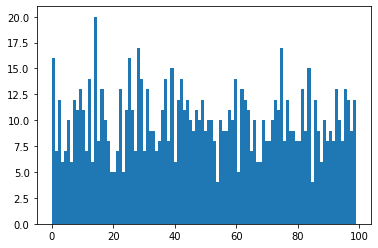

In [70]:
_ = plt.hist(data, 100)

If we run the dataset cell again, we'll get a different result.

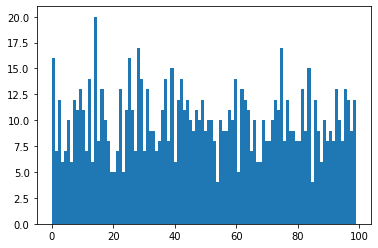

In [69]:
data = [random.randrange(0, 100) for _ in range(1000)]
_ = plt.hist(data, 100)

Notice that while the generated data between two runs are different, their distribution is the same - they are both a uniform distribution of integers from 0 to 100. We can visualise the same distribution of floats from 0 to 100 generated by the `uniform()` function.

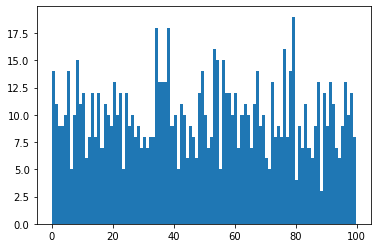

In [71]:
data = [random.uniform(0, 100) for _ in range(1000)]
_ = plt.hist(data, 100)

### Random numbers from a normal distribution

The normal distribution is also called the *gaussian distribution*. Numbers near the mean of the distribution are more likely to be picked out than the ones at the edges. This gives the plot of a bell shape which centres at the mean of the distribution. To generate a number in a normal distribution, we use the `gauss()` function and specify the mean and the standard deviation.

For example, if we want a number from a group of numbers where the mean is 0 and the standard deviation is 2, we write it as:

In [53]:
random.gauss(0, 2)

-0.2789882235530813

We can plot down the distribution using matplotlib. The following plots 1000 numbers where the mean is 0 and standard deviation is 2. The graph shows the bell peaking at the mean, and the values are multiples of 2.

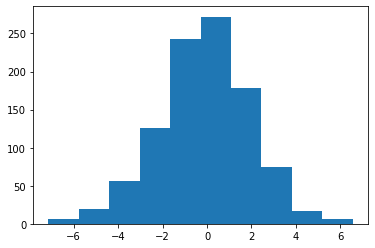

In [72]:
data = [random.gauss(0, 2) for _ in range(1000)]
n, bins, _ = plt.hist(data, 10)